In [1]:
#Second part of names, using some machine learning code to see the relationship between names and gender

#imports
import pandas as pd
from sklearn import preprocessing, cross_validation, metrics
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from matplotlib.pyplot import style

style.use('ggplot')

names = pd.read_csv('NationalNames.csv')

#isolate 2014 data
names_14 = names[names.Year == 2014]

X = names_14.Name
y = names_14.Gender

men = names[names.Gender == 'M'].count()[0]
women = names[names.Gender == 'F'].count()[0]
tot = names.count()[0]

#see our baseline data
print(men/tot)
print(women/tot)


0.407437577824
0.592562422176


In [2]:
#alright, slightly more women in the dataset.

#Lets preprocess the data
le = preprocessing.LabelEncoder()
y_bin = le.fit_transform(y)

#Split data into training and testing set
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y_bin)

#Preprocess names data
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

#Try multinomial naive bayes
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.524391720131


In [ ]:
#Overall, in 2014, using name ot predict gender gives us about 50% accuracy

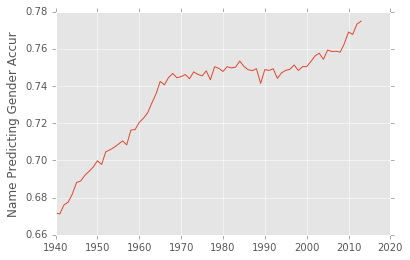

[(0.77486974068608261, 1940), (0.77324545778411113, 1941), (0.76769317074610999, 1942), (0.76901383625627917, 1943), (0.76280129166186139, 1944), (0.75819660436581537, 1945), (0.75869571440840511, 1946), (0.7585488273797294, 1947), (0.75935204254141953, 1948), (0.75436241610738253, 1949), (0.75764283193789494, 1950), (0.75615183246073303, 1951), (0.75314761574303557, 1952), (0.7504283842354601, 1953), (0.75038536995515692, 1954), (0.74834175899035527, 1955), (0.75130725013906918, 1956), (0.74900639691131388, 1957), (0.74842791411042942, 1958), (0.74704773627726273, 1959), (0.74411526755788415, 1960), (0.74929178470254953, 1961), (0.74836679413639262, 1962), (0.74883664468093714, 1963), (0.74136407624016498, 1964), (0.74930673584399321, 1965), (0.74825893900444029, 1966), (0.74878875968992253, 1967), (0.75053549190535496, 1968), (0.75342325247448583, 1969), (0.75010311404413277, 1970), (0.74973321815132887, 1971), (0.75038528716736874, 1972), (0.74782653428674317, 1973), (0.749500788229

In [3]:
#Let's see how well our new model does over the years

predictions = []
for i in list(reversed(range(1940, 2014))):
    X_47 = names[names.Year == i].Name
    y_47 = names[names.Year == i].Gender
    le = preprocessing.LabelEncoder()
    y_47_bin = le.fit_transform(y_47)
    X_47_dtm = vect.transform(X_47)
    y_pred_class = nb.predict(X_47_dtm)
    predictions.append(metrics.accuracy_score(y_47_bin, y_pred_class))

%matplotlib inline    
plt.plot(list(reversed(range(1940, 2014))), predictions)
plt.ylabel('Name Predicting Gender Accur')
plt.show()

print(list(zip(predictions, range(1940, 2014))))